# Regression

We are going to work on a dataset about prices of houses in Boston. Our goal will be to predict the price of a house, knowing for example its number of rooms or its location. For this you will use the linear regression model that you saw this morning.

This excercise is split into two parts : a first part where you will only use one variable and build your own sickit-learn estimator and a second part where you can use all the variables in the database and the linear regression model implemented in sickit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

## Simple linear regression

The goal of this first excercise is to build a simple linear model with one variable and visualize its results.
We are going to study the relation between the price of a house and its number of rooms, using a simple linear regression.

The dataset you are going to use can be found here (.../house_prices.tsv).
Information about this dataset (including name and meaning of variables) can be found here (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

The target variable in our case is therefore "MEDV", the median value of a house. 
As predicting variable you should only use for now "RM", the average number of rooms.

You should implement your solution creating a sickit-learn estimator of the following type : 
``` python
class Estimator(base.BaseEstimator, base.RegressorMixin)
    def __init__(self, ...):
        # initialization code

    def fit(self, X, y):
        # fit the model ...
        return self

    def predict(self, X):
        return # prediction
```

After fitting this estimator with observations of the database, you should use the predict method to plot the ouput of the model.
This plot should be a combination of a scatter plot with all the observations of the dataset and a linear plot using the fitted model. If your model is correct, the linear plot should be "close to" the observations of the dataset.


## Multiple linear regression

After this introductory exercise, you are going to build a full model to predict the price of a house using all the variables of the dataset (excep MEDV of course!).

In this case you can use the already built LinearRegression class of sickit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which works with the usual fit and predict methods.

You should be careful to split your dataset in a training and testing set to avoid overfitting and score your model properly.

In order to improve your model, you can apply some transformations on your dataset or optimize the parameters of the linear regression. If you see for example that one variable seems to behave like an inverse function with respect to the target variable, you can create a new variable equal to the inverse of the original variable. This new variable should behave more linearly with the target variable.

# Part-1

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15

## Loading the modules

In [72]:
import numpy as np
import sklearn as sk
import sklearn.metrics as metrics
import pandas
import scipy as sp

## Loading Data

In [73]:
f = '../../Data/house_price.tsv'
data=np.loadtxt(f,delimiter=',')
data.shape

(506, 14)

Text(0.5,1,'Plot showing Median value of owner-occupied homes in $1000s wrt number of rooms')

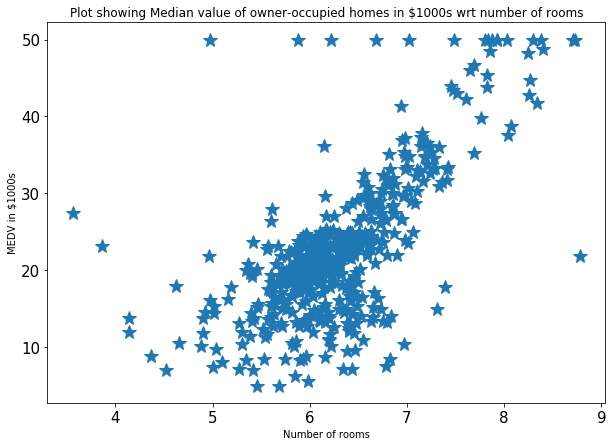

In [74]:
x = data[:,5]
y = data[:,13]

plt.plot(x,y,'*')
plt.ylabel('MEDV in $1000s')
plt.xlabel('Number of rooms')
plt.title('Plot showing Median value of owner-occupied homes in $1000s wrt number of rooms')

In [75]:
class Estimator(sk.base.BaseEstimator, sk.base.RegressorMixin):
    def __init__(self, name='linear_reg'):
        self.name = name
        self.a = 0
        self.b = 0
        
    def fit(self, x, y):
        # fit the model ...
        avex = x.mean()
        avey = y.mean()
#Estimating the slope and intercept in the linear fit
        self.b = np.cov(x, y)[0][1] / np.cov(x)
        self.a = avey - self.b * avex
        return self

    def predict(self, x):
# The line of the form y = a + bx        
        return self.a + self.b*x

#For the R**2 scores which is esimated between the y and the pridicted y as the result of 
# the linear fit
    def r2_score(self, x,y):
        return metrics.r2_score(y,self.predict(x))


(404,) (404,)
The fitted coefficients for slope is: 9.348301406497724
The fitted intercept is: -36.24631889813793
R^2 = 0.370756923225


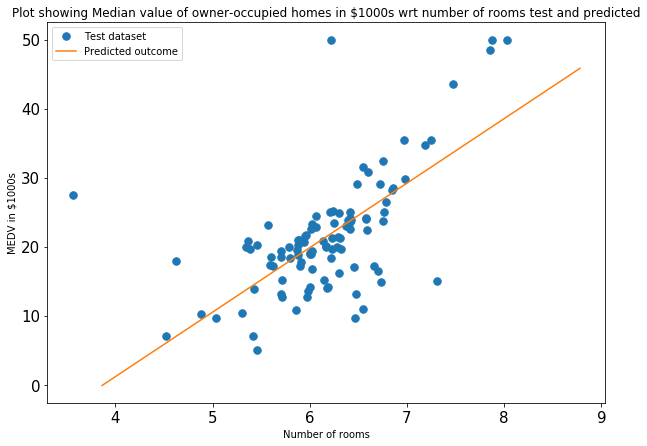

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

# Splitting the data-set in training and test sample
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print X_train.shape,y_train.shape

linear_model = Estimator()    
linear_model.fit(X_train, y_train)
X_line = np.linspace(np.amin(X_train),np.amax(X_train),100)
y_predict = linear_model.predict(X_line)
# y_line_pred = linear_model.predict(X_line)


plt.plot(X_test,y_test,'.',label='Test dataset')
plt.plot(X_line,y_predict,'-',label='Predicted outcome')
plt.legend()
plt.ylabel('MEDV in $1000s')
plt.xlabel('Number of rooms')
plt.title('Plot showing Median value of owner-occupied homes in $1000s wrt number of rooms test and predicted')
# plt.plot(X_line,y_line_pred,'*')

#Here I am extracting the constant values of the fit
print("The fitted coefficients for slope is: {0}".format(str(linear_model.b)))
print("The fitted intercept is: {0}".format(str(linear_model.a)))
print("R^2 = {0}".format(linear_model.r2_score(X_test,y_test)))

## Part-2: Multiple linear regression

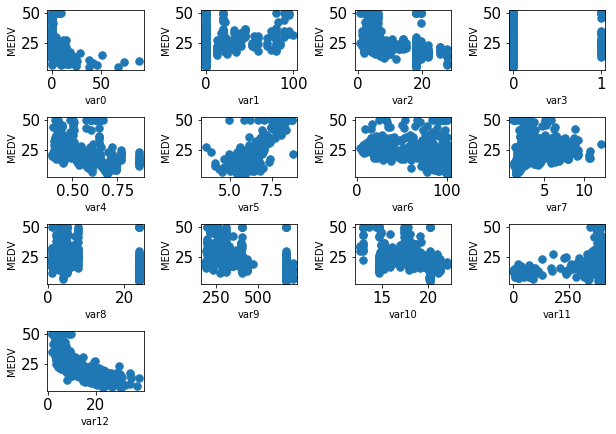

In [108]:
plt.subplots_adjust(wspace=0.6, hspace=0.8)

for var_idx in range(data.shape[1]-1):
    plt.subplot(4,4, var_idx+1)
    plt.plot(data[:,var_idx], data[:,-1], '.')
    plt.xlabel('var{0}'.format(var_idx))
    plt.ylabel('MEDV')

In [129]:

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
# from sklearn.pipeline import Pipeline

# Splitting the data-set in training and test sample
X_train, X_test, y_train, y_test = train_test_split(data[:,0:13], data[:,-1], test_size=0.2, random_state=42)

#to know if the shapes of the array are correct
print X_train.shape,y_train.shape

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)

print("The fitted coefficients are: {0}".format(str(linear_model.coef_)))
print("The fitted intercept are: {0}".format(str(linear_model.intercept_)))
print("On test set R^2 = {0}".format(linear_model.score(X_test,y_test)))
print("On training set R^2 = {0}".format(linear_model.score(X_train,y_train)))

(404, 13) (404,)
The fitted coefficients are: [-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
 -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
  2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
 -5.09349120e-01]
The fitted intercept are: 30.28894833936872
On test set R^2 = 0.668482575397
On training set R^2 = 0.750883778673


## Using Inverse 
Looking at the plots the inverse transtorm on var 0,6,9,10,12 would be effective.

In [128]:
class Transform(sk.base.BaseEstimator, sk.base.RegressorMixin):
    def __init__(self, name='transform'):
        self.name = name
        self.gamma = 1.0
        
        
    def inverse(self, x):
        # this retunrs the inverse of the value...
        return 1.0/x

    def power_transform(self, x):
        return x**self.gamma

In [142]:
transform_var = Transform()
data_tmp = data
variables=[0,6,9,10,12]

for i in variables:
    data_tmp[:,i] = transform_var.inverse(data_tmp[:,i])

    
X_train, X_test, y_train, y_test = train_test_split(data[:,0:13], data[:,-1], test_size=0.2, random_state=42)

#to know if the shapes of the array are correct
print X_train.shape,y_train.shape

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)

print("The fitted coefficients are: {0}".format(str(linear_model.coef_)))
print("The fitted intercept are: {0}".format(str(linear_model.intercept_)))
print("On test set R^2 = {0}".format(linear_model.score(X_test,y_test)))
print("On training set R^2 = {0}".format(linear_model.score(X_train,y_train)))    

(404, 13) (404,)
The fitted coefficients are: [-1.07722648e-02 -1.05980622e-02 -5.55797539e-02  2.52174304e+00
 -1.70508833e+01  3.42621337e+00 -8.03633451e+00 -9.79515984e-01
  1.28341647e-01  1.25415638e+03  2.79232685e+02  1.27749636e-02
  5.76317004e+01]
The fitted intercept are: -16.271753537658412
On test set R^2 = 0.725672040476
On training set R^2 = 0.78974314307


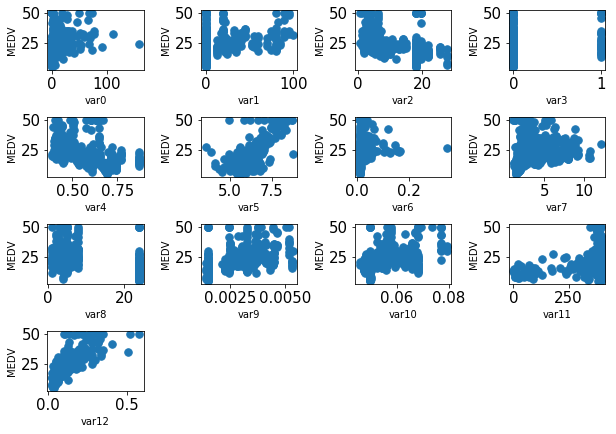

In [143]:
plt.subplots_adjust(wspace=0.6, hspace=0.8)

for var_idx in range(data_tmp.shape[1]-1):
    plt.subplot(4,4, var_idx+1)
    plt.plot(data_tmp[:,var_idx], data[:,-1], '.')
    plt.xlabel('var{0}'.format(var_idx))
    plt.ylabel('MEDV')

## Result from Use of Inverse

The `R^2` value for both test and training set has improved from `0.668482575397` to `0.725672040476` for the test set and `0.750883778673` to `0.78974314307` for the training data set.